# **House Price Prediction with Scikit Learn**

## Download the dataset 

In [1]:
import os
import tarfile
import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_path = os.path.join("datasets", "housing")
housing_url = download_root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url= housing_url, housing_path = housing_path):
    os.makedirs(housing_path, exist_ok=True)  # Makes the directory required if dir already exists then no error raised due to exist_ok = True
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)  # Takes the file from the github repo and stores it in the above path
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    
# Calling the function
fetch_housing_data()

In [2]:
# # Just a code to make a new directory using os.path.join
# new_path = os.path.join("datasets/housing", "testdir")
# os.makedirs(new_path, exist_ok=True)

## Load data using Pandas

In [3]:
import pandas as pd

In [4]:
def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv") # Basically the full path till housing.csv
#     print(csv_path)
    return pd.read_csv(csv_path)


In [5]:
housing = load_housing_data(housing_path)

In [6]:
# DataFrame
type(housing)

pandas.core.frame.DataFrame

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Types of values in the Ocean Proximity object type
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Description of the DataFrame 
housing.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


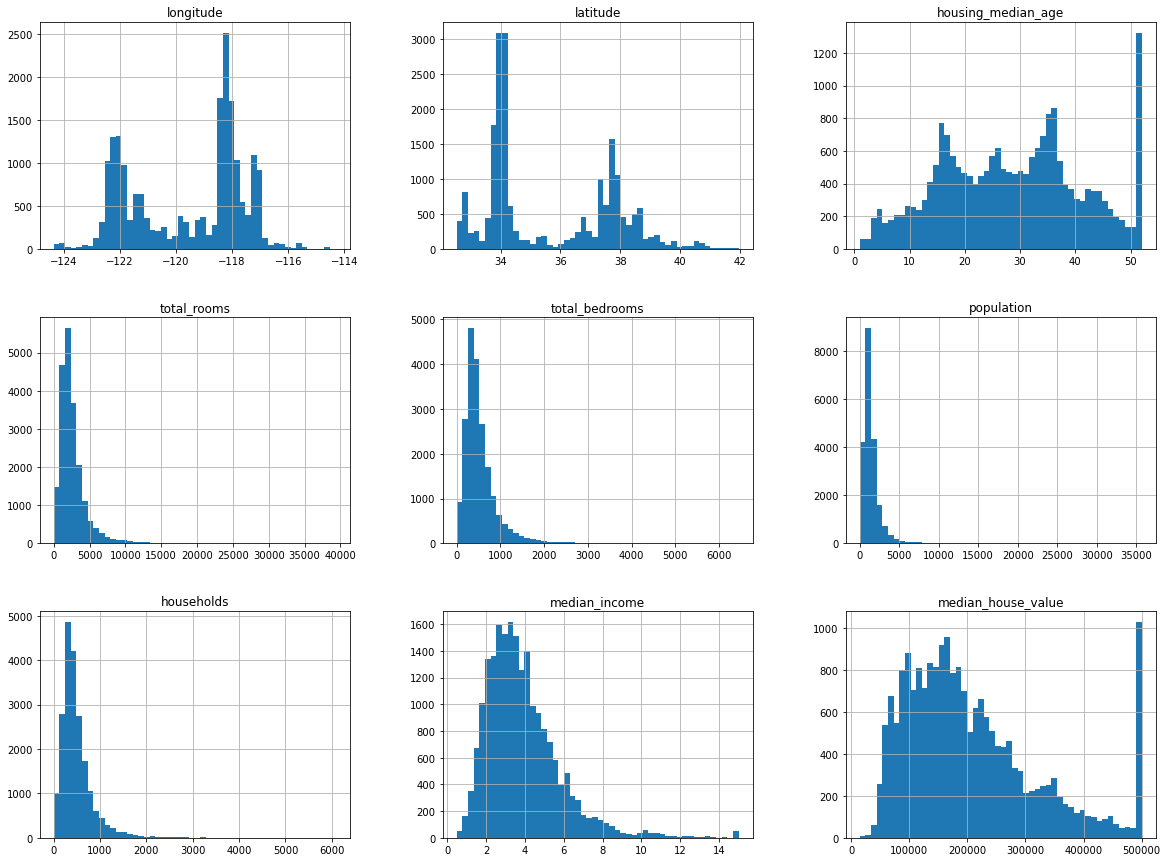

In [11]:
# Plot the graph for the whole dataset

%matplotlib inline 
import matplotlib.pyplot as plt 
# housing["longitude"].hist(figsize=(10,10))  ## For individual plots
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# len(housing)

## Create a test dataset

In [13]:
import numpy as np

In [14]:
def split_train_test(data, test_ratio):
#     np.random.seed(42) ## Generates a constant dataset split even if the data is loaded again
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio) # Test ratio: How much % of the total do we want in the test set
#     print(test_set_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # iloc: Select by location of indices (Basically data on indices is grouped together and returned)
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2) # Take 20% of data as a test set

In [16]:
len(train_set)

16512

In [17]:
len(test_set)

4128

In [18]:
train_set #(Random 16512 examples)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7384,-118.25,33.97,43.0,1735.0,535.0,2288.0,524.0,1.9119,98800.0,<1H OCEAN
16855,-122.42,37.62,36.0,1538.0,256.0,671.0,247.0,4.4091,317900.0,NEAR OCEAN
5372,-118.38,34.04,45.0,767.0,130.0,254.0,118.0,6.2895,340400.0,<1H OCEAN
4461,-118.18,34.10,7.0,2529.0,689.0,1215.0,577.0,4.7853,153100.0,<1H OCEAN
17242,-119.67,34.38,28.0,1814.0,526.0,849.0,420.0,3.1625,364300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
14037,-117.14,32.75,25.0,1908.0,513.0,956.0,467.0,2.4828,133300.0,NEAR OCEAN
5332,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,268800.0,<1H OCEAN
10444,-117.61,33.43,24.0,2303.0,399.0,851.0,379.0,3.9875,346500.0,NEAR OCEAN
7446,-118.16,33.93,35.0,757.0,151.0,474.0,132.0,3.7361,179800.0,<1H OCEAN


In [19]:
test_set # Total 4128 examples

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6555,-118.10,34.18,39.0,2321.0,336.0,880.0,339.0,7.7108,450000.0,INLAND
11119,-117.85,33.85,17.0,4678.0,1065.0,2427.0,1020.0,4.2276,254100.0,<1H OCEAN
5813,-118.26,34.14,23.0,1336.0,396.0,1255.0,359.0,2.5388,205000.0,<1H OCEAN
7036,-118.08,33.96,35.0,2104.0,399.0,1659.0,387.0,4.0096,165000.0,<1H OCEAN
13565,-117.29,34.16,38.0,2458.0,488.0,1135.0,453.0,2.8750,99100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
14331,-117.15,32.72,51.0,1321.0,NaN,781.0,499.0,1.3071,250000.0,NEAR OCEAN
2364,-119.59,36.72,18.0,1284.0,193.0,621.0,190.0,4.5375,130600.0,INLAND
4845,-118.31,34.03,52.0,1902.0,406.0,1233.0,385.0,2.8295,132200.0,<1H OCEAN
7413,-118.23,33.96,42.0,1977.0,570.0,2406.0,557.0,2.5913,151600.0,<1H OCEAN


## Hash Function for consistent splitting of data

In [20]:
from zlib import crc32

In [21]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [22]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
housing_with_id = housing.reset_index() # Adds an index column
train_set , test_set = split_train_test_by_id(housing_with_id, 0.2 , "index")

In [24]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

## Scikit Learn inbuilt function to split dataset into training set and test set

In [25]:
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
# The random_state acts like the random seed parameter
train_set, test_set = train_test_split(housing, test_size=0.2 , random_state=42)

In [27]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [28]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


## New *Income Category* to avoid bias in the median income column

In [29]:
# np.inf denotes from 6 to inf is the last division
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0. , 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

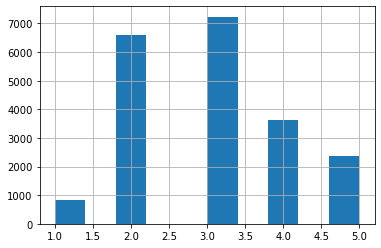

In [30]:
housing["income_cat"].hist()

In [31]:
# New column is now introduced
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


## Create Stratified Sampling

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state= 42)

In [34]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [35]:
strat_test_set["income_cat"].value_counts()
# This means there are 1447 instances in the test set that belong to the 3rd income group

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [36]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [37]:
strat_train_set["income_cat"].value_counts() 

3    5789
2    5265
4    2911
5    1889
1     658
Name: income_cat, dtype: int64

In [38]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

### We can thus see that the test and the train sets are properly sorted in this case

In [39]:
# Remove the "income_cat" attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

In [40]:
# The attribute has been dropped 
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


## Explore the data

In [41]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

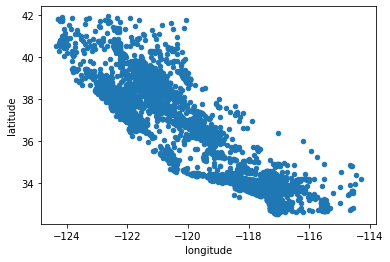

In [42]:
# A geographical plot

housing.plot(kind= "scatter", x = "longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

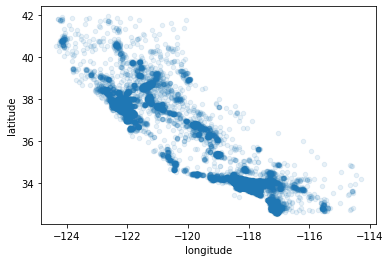

In [43]:
# Alpha for getting points with high density of data points
# Alpha is a blending value between 0(transparent) & 1(opaque)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

## Using Colormap for plotting features

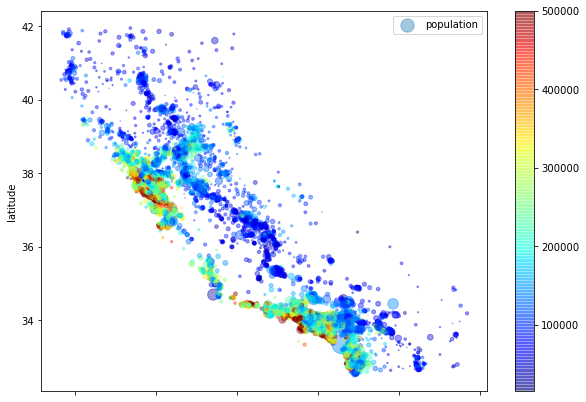

In [44]:
housing.plot(kind="scatter", x = "longitude", y ="latitude", alpha =0.4,
             s=housing["population"]/100, label ="population", figsize=(10,7),
             c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar= True)
# All open figures ar displayed
plt.legend()

## Looking of Correlations

In [45]:
# The correlation coeffecient

corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

### This actually calculates how much each feature relate with others and thus for the same feature the value is 1.000

**The values below show, how much a feature relates to the median_house_value. Range--(-1,1) and thus the more close to 1; the more it is positively correlated to the feature.**

In [46]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

## Pandas - scatter_matrix function to understand the correlations in data

In [47]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

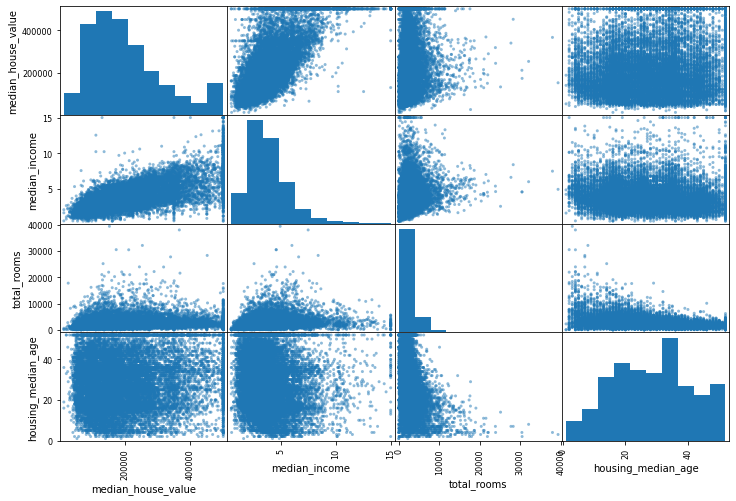

In [48]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

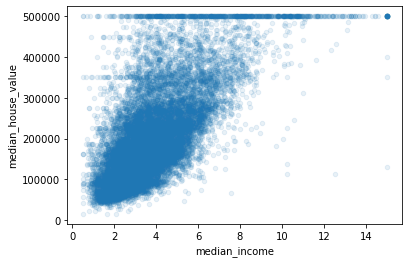

In [49]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## Create new useful attributes

In [50]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [51]:
# Check the new DataFrame for the new columns
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [52]:
# Find the correlation

corr_matrix = housing.corr()

In [53]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Note about Correlation
**Correlations can be positive, negative or 0.** 

### Positive: Both the features are moving in the same direction
### Negative: Both are moving in the opposite direction
### 0: No linear correlation

In [54]:
# Previous housing DataFrame

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


## Seperate predictors and labels

In [55]:
# drop() method
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [56]:
# Housing got replaced by the new DataFrame where there are no new features and also there is no median_housing_value due to the drop() function

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [57]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

## Data cleaning: Deal with missing values in: total_bedrooms

## Data Cleaning: Scikit Learn SimpleImputer Class

In [58]:
# Counting the missing in each attribute

housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [59]:
from sklearn.impute import SimpleImputer

# Initialize an object for the Imputer class
imputer = SimpleImputer(strategy= "median")

In [60]:
# Dropping the ocean proximity attribute

housing_num = housing.drop("ocean_proximity", axis=1)

In [61]:
# Total attributes

print(len(housing_num.head().keys()))
housing_num.head()

8


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [62]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [63]:
# Stored medians for all the attributes
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [64]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
# Replace all the missing values with the medians of the other values

X = imputer.transform(housing_num)

In [66]:
# Put back the values in a Pandas DataFrame

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [67]:
housing_tr.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

## Handling the Text & Categorical attributes

In [68]:
# Taking just the ocean proximity parameter
housing_cat = housing[["ocean_proximity"]]

In [69]:
type(housing_cat)

pandas.core.frame.DataFrame

In [70]:
housing_cat["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [71]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [72]:
# Convert the above categories into numbers

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [73]:
# fit transform method
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [74]:
# See the indices and see the above encoding

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One hot encoder

In [75]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [76]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [77]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [78]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom transformer

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Pipelines (Sequence of transforms)

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

## ColumnTransformer

In [82]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [83]:
type(housing_prepared)

numpy.ndarray

## Select and Train a model: Linear Regression Model

In [84]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lin_reg = LinearRegression()

# Training the model on the training data
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

## Initial Testing

In [85]:
# Making further spilts in data for testing

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [86]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [87]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


### Measuring the RMSE of the full training set

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
# Calcuate the error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


### The above 68000 means that the house values that are predicted have an error of $68000. Model *underfits* the data

### ***As the model is underfitting thus we have to select a more powerful model, feed better features, reduce the constraints.***

## **DecisionTreeRegressor Model**

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
# Declare an instance of the decision tree
tree_reg = DecisionTreeRegressor()

# Train the regressor
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [92]:
# Make predictions

print("Predictions:", tree_reg.predict(some_data_prepared))

Predictions: [286600. 340600. 196900.  46300. 254500.]


In [102]:
print("Ground truth:", list(some_labels))

Ground truth: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


### Calculate RMSE: Error is 0 as we can see

In [94]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


### This clearly means that the model is overfitting the data

## Evaluation using Cross Validation: *K fold cross validation*

In [95]:
from sklearn.model_selection import cross_val_score

In [97]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [98]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [99]:
display_scores(tree_rmse_scores)

Scores:  [68453.76323743 66828.60884904 70291.03584271 69894.70844319
 71122.47071429 75348.49735775 71657.56050487 70456.86795964
 77597.43414568 69983.9887835 ]
Mean:  71163.49358381008
Standard Deviation:  2992.508087598926


### The scores are the RMS errors made by the model

## The effect of overfitting is visible; we get a worse performance than Linear Regression model

## Cross Validation for Linear Regression model

In [100]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798343


### The Decision Tree model is overfitting so badly that it performs worse than Linear Regression model

## Using Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

# Predictions for some_data
print("Predictions: ", forest_reg.predict(some_data_prepared))
print("Ground Truth: ", list(some_labels),"\n")

# Normal RMSE

forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Forest_RMSE: ", forest_rmse)

Predictions:  [267692.   333102.01 224417.    49784.   234986.  ]
Ground Truth:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0] 

Forest_RMSE:  18736.046049554123


In [111]:
# Cross Validation

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49553.50073665 47782.98428151 49819.88479651 52660.40670218
 49696.72675056 53473.80655147 48652.23692233 47820.49795565
 53322.254773   50159.66426392]
Mean:  50294.196373378356
Standard Deviation:  2028.4989791536773


## Further the model can be tweaked using Grid & Randomized Search. *This brings us to the end of the notebook*